##ANALISIS DEL COVID-19
#¿Por qué es importante investigar sobre esta temática?

La razón por la cual me intereso realizar un análisis respecto a los casos de COVID-19 que han ocurrido en todo el mundo, es para poder entender el impacto que causo en todos los países del mundo. El mismo,ha demostrado ser un evento sin precedentes que ha afectado a casi todos los aspectos de la sociedad global.


Algunas de las variables donde se pudo ver reflejada su incidencia fueron y son:

####Salud pública y atención médica:
Examinar la propagación de los casos de  COVID-19 en diferentes regiones y países proporcionó información valiosa sobre cómo se ha comportado el virus y cómo ha impactado en términos de carga de enfermedad, hospitalizaciones y mortalidad. Esto es esencial para mejorar la respuesta en salud pública y planificar adecuadamente los recursos médicos en situaciones similares en el futuro.

####Lecciones para futuras pandemias:
El análisis detallado de cómo los gobiernos, organizaciones de salud y comunidades han abordado la pandemia proporciona conocimientos valiosos para futuras crisis sanitarias. Comprender qué estrategias funcionaron y cuáles no, cómo se comunicaron los riesgos y cómo se tomaron decisiones puede ayudar a prepararse mejor para enfrentar situaciones similares.

####Impacto socioeconómico:
El COVID-19 ha tenido un impacto significativo en la economía global, con cierres de negocios, pérdida de empleos y recesiones en muchas partes del mundo. El análisis de estos efectos económicos puede informar las políticas gubernamentales y las estrategias de recuperación para mitigar los daños en futuras crisis.

####Desigualdades y vulnerabilidades:
La pandemia ha resaltado y ampliado las desigualdades existentes en la sociedad. El análisis de cómo diferentes grupos demográficos se vieron afectados de manera desproporcionada puede llevar a una mayor conciencia sobre estas disparidades y fomentar acciones para abordarlas.


####Avances científicos y médicos:
La investigación sobre el virus y la enfermedad ha avanzado significativamente en poco tiempo. Analizar cómo se ha compartido el conocimiento científico, cómo se han desarrollado vacunas y tratamientos, y cómo se ha comunicado esta información puede informar sobre cómo acelerar la respuesta científica en el futuro.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
!pip install missingno

#Información del Dataset

El dataset trabajado, es acerca de la problematica mundial ocurrida a principios de Marzo del 2020, "Covid-19". La idea de este trabajo es poder dar respuesta, a diferentes preguntas que fueron surgiendo a lo largo del entendimiento y visualización de la información disponible. Las preguntas que se van a intentar responder con distintas visualizaciones y calculos son:


*  ¿Cuales son los 5 países principales en los cuales hubieron más cantidad de muertes?
*   Segun la cantidad de casos de Covid, cuantos finalizaron en muertes y cuantos se recuperaron?
*  De los casos activos actualmente, cuantos terminaron en muertes y cuantos se recuperaron?
*  ¿Cuales son los 5 países principales en los cuales, hay mas casos activos?
* ¿Cuáles son los 5 países principales en los cuales, hay más casos recuperados?


Además, agregaré otro dataset, que tendrá información considerada relevante para este analisis. El mismo, posee la cantidad de vacunaciones por país.


# Lectura de archivos

In [47]:
df_covid=pd.read_csv('/content/country_wise_latest.csv',sep=';')
df_covid.head()

,iso_code,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,AFG,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,ALB,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,ALG,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,AND,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,ANG,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [6]:
print(df_covid.columns)

Index(['iso_code', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'New cases', 'New deaths', 'New recovered',
       'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')


In [58]:
df_covid = df_covid.rename(columns={'Country/Region': 'Country'})
df_covid.head()

,iso_code,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,AFG,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,ALB,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,ALG,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,AND,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,ANG,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [9]:
df_vacunation=pd.read_csv('/content/vaccinations.csv',sep=',')
df_vacunation.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003


#Exploracion  de los datasets

In [ ]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location                187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [ ]:
df_vacunation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174234 entries, 0 to 174233
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   location                             174234 non-null  object 
 1   iso_code                             174234 non-null  object 
 2   date                                 174234 non-null  object 
 3   total_vaccinations                   76588 non-null   float64
 4   people_vaccinated                    73341 non-null   float64
 5   people_fully_vaccinated              69866 non-null   float64
 6   total_boosters                       45062 non-null   float64
 7   daily_vaccinations_raw               63042 non-null   float64
 8   daily_vaccinations                   172904 non-null  float64
 9   total_vaccinations_per_hundred       76588 non-null   float64
 10  people_vaccinated_per_hundred        73341 non-null   float64
 11  people_fully_

#Borrado de duplicados

In [10]:
print(df_covid.shape)
df_covid=df_covid.drop_duplicates()
print(df_covid.shape)

(187, 16)
(187, 16)


In [11]:
print(df_vacunation.shape)
df_vacunation=df_vacunation.drop_duplicates()
print(df_vacunation.shape)


(179143, 16)
(179143, 16)


#DATA WRANGLING

#Analisis de nulos

In [12]:
# Calcula el número de valores nulos por columna
null_counts = df_covid.isnull().sum()

# Calcula el porcentaje de valores nulos por columna
total_rows = df_covid.shape[0]
null_percentage = (null_counts / total_rows) * 100

# Resultados
null_df = pd.DataFrame({'Columna': null_counts.index, 'Valores Nulos': null_counts.values, 'Porcentaje Nulo': null_percentage.values})

print(null_df)


                   Columna  Valores Nulos  Porcentaje Nulo
0                 iso_code              0              0.0
1                 location              0              0.0
2                Confirmed              0              0.0
3                   Deaths              0              0.0
4                Recovered              0              0.0
5                   Active              0              0.0
6                New cases              0              0.0
7               New deaths              0              0.0
8            New recovered              0              0.0
9       Deaths / 100 Cases              0              0.0
10   Recovered / 100 Cases              0              0.0
11  Deaths / 100 Recovered              0              0.0
12     Confirmed last week              0              0.0
13           1 week change              0              0.0
14       1 week % increase              0              0.0
15              WHO Region              0              0

Como se mencionó anteriormente, el dataframe df_covid no posee valores nulos, por lo que no resulta interesante seguir investigando sobre esto.

In [13]:
# Calcula el número de valores nulos por columna
null_counts = df_vacunation.isnull().sum()

# Calcula el porcentaje de valores nulos por columna
total_rows = df_vacunation.shape[0]
null_percentage = (null_counts / total_rows) * 100

# Resultados
null_df_vac = pd.DataFrame({'Columna': null_counts.index, 'Valores Nulos': null_counts.values, 'Porcentaje Nulo': null_percentage.values})

print(null_df_vac)


                                Columna  Valores Nulos  Porcentaje Nulo
0                              location              0         0.000000
1                              iso_code              0         0.000000
2                                  date              0         0.000000
3                    total_vaccinations         100616        56.165186
4                     people_vaccinated         103969        58.036876
5               people_fully_vaccinated         107372        59.936475
6                        total_boosters         132303        73.853290
7                daily_vaccinations_raw         114511        63.921560
8                    daily_vaccinations           1353         0.755263
9        total_vaccinations_per_hundred         100616        56.165186
10        people_vaccinated_per_hundred         103969        58.036876
11  people_fully_vaccinated_per_hundred         107372        59.936475
12           total_boosters_per_hundred         132303        73

En el caso de del dataframe vacunaciones posee valores nulos, por lo que se opta por seguir adelante analizandolo.

#Visualizando gráficamente: solo columnas con % nulos


In [14]:
# Columnas con porcentaje de nulos
pd.set_option('display.max_rows', None)  # or 1000
serie=(df_vacunation.isnull().sum()/df_vacunation.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

total_boosters                         73.853290
total_boosters_per_hundred             73.853290
daily_vaccinations_raw                 63.921560
people_fully_vaccinated                59.936475
people_fully_vaccinated_per_hundred    59.936475
people_vaccinated                      58.036876
people_vaccinated_per_hundred          58.036876
total_vaccinations                     56.165186
total_vaccinations_per_hundred         56.165186
daily_people_vaccinated                 0.926076
daily_people_vaccinated_per_hundred     0.926076
daily_vaccinations                      0.755263
daily_vaccinations_per_million          0.755263
dtype: float64

<Axes: >

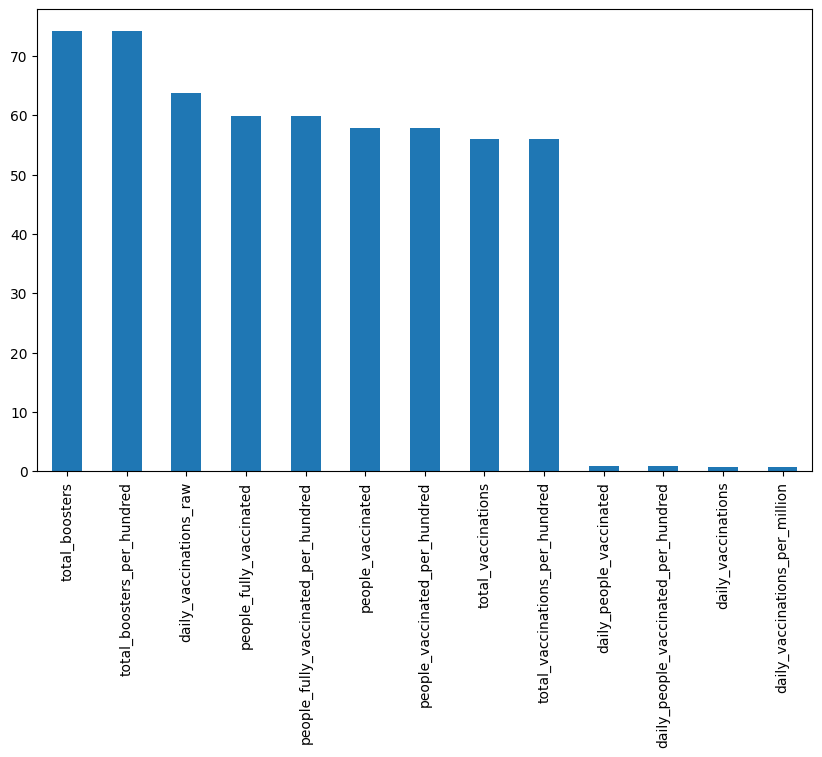

In [ ]:
# Graficamente
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
serie.plot(kind='bar')

#Análisis de nulos graficamente usando librería missingno

<Axes: >

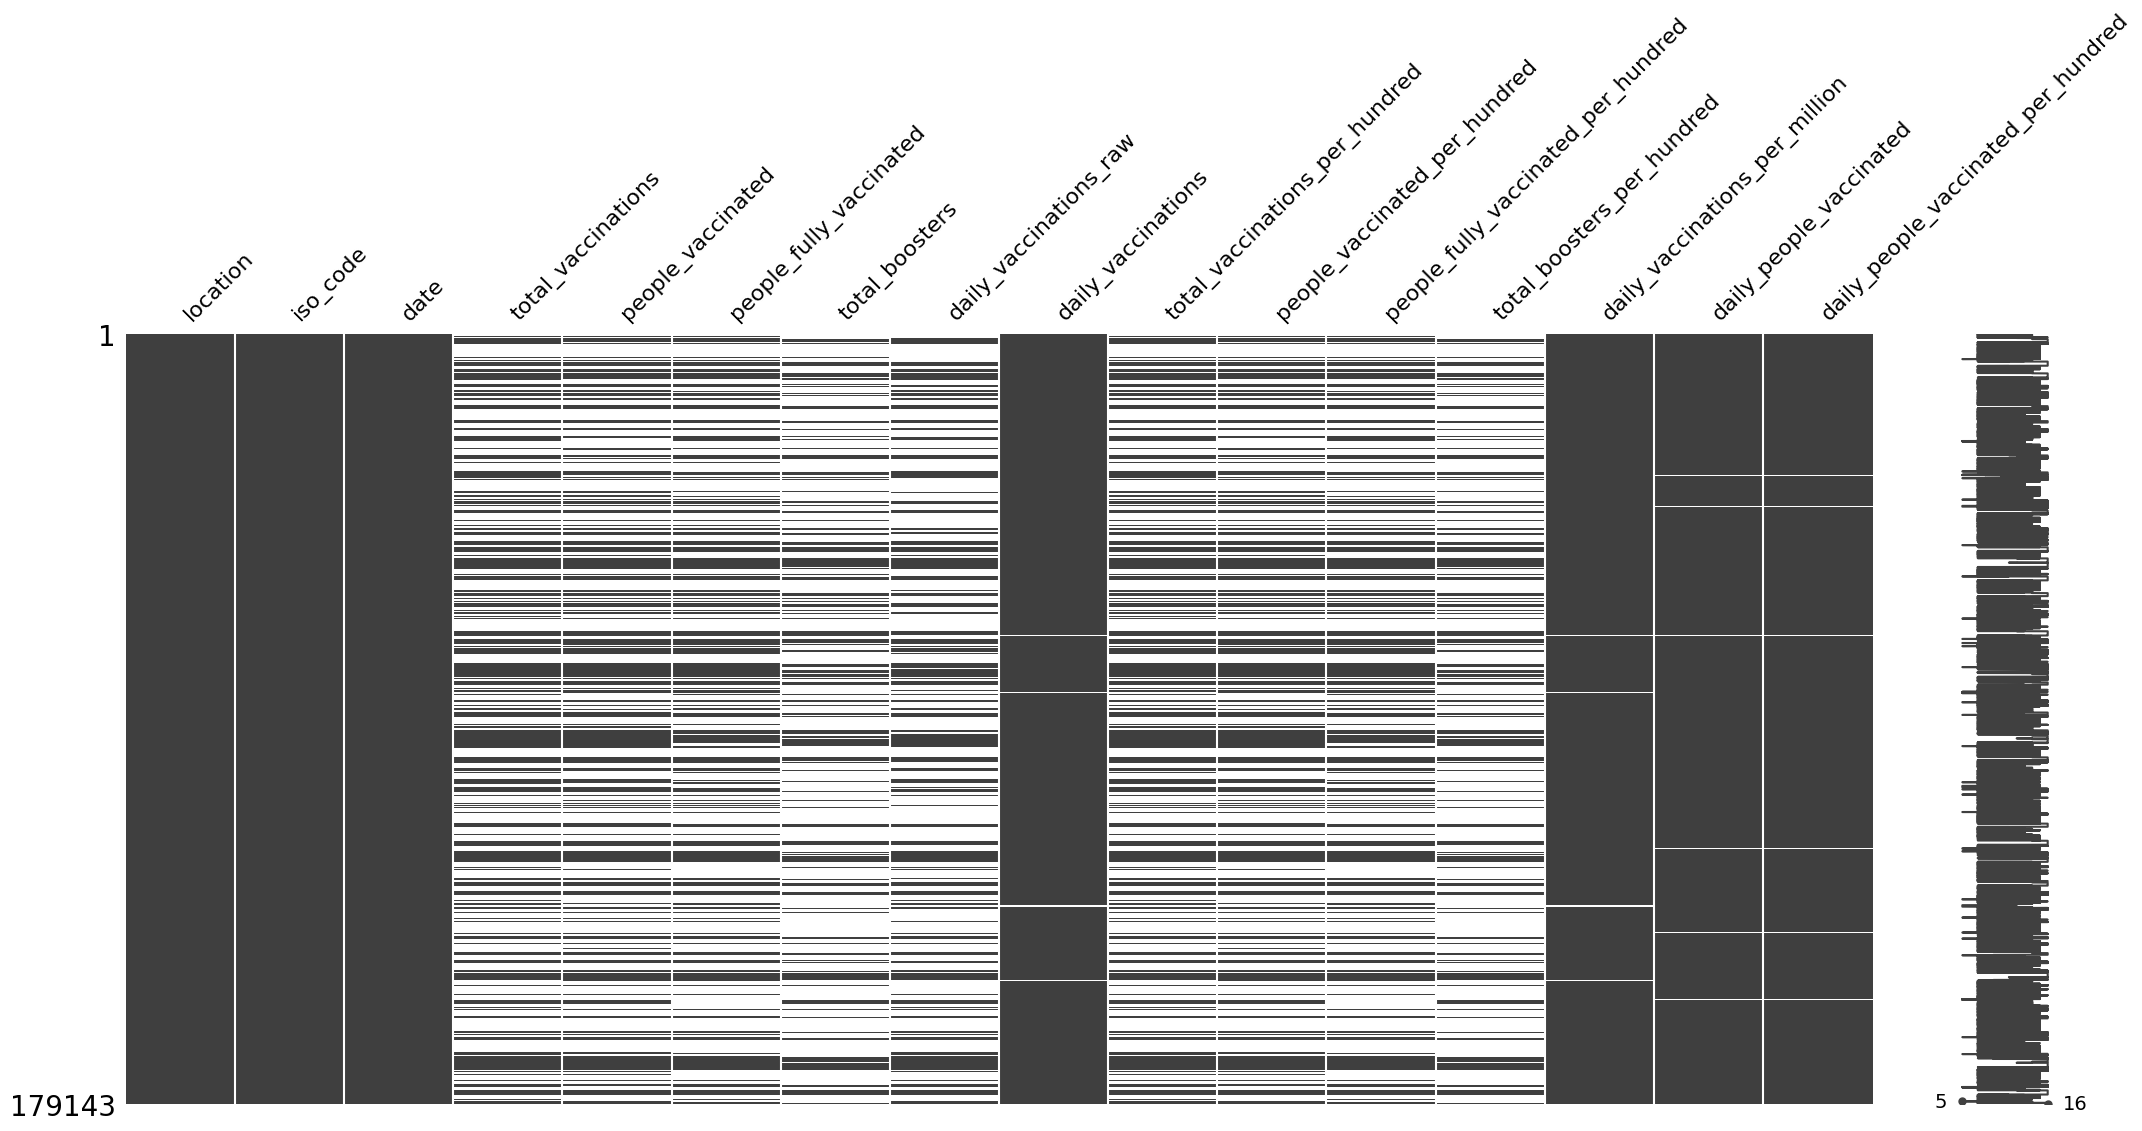

In [18]:
msno.matrix(df_vacunation)

#Analizo columna por columna las que tienen nulos y decidir

In [19]:
def nulos(columna):
  registros = len(columna)
  nulos = columna.isnull().sum()
  porcentaje = round(nulos * 100 / registros,3)
  print(f'Total de valores nulos en la columna: {nulos} ( {porcentaje}%)\n')

In [20]:
df_vacunation.columns

Index(['location', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'daily_vaccinations_per_million', 'daily_people_vaccinated',
       'daily_people_vaccinated_per_hundred'],
      dtype='object')

Las columnas de interés para el proyecto son:

*   Location
*   date
*   total_vaccinations
*   people_vaccinated
*   daily_vaccinations_raw
*   daily_vaccinations
*   daily_people_vaccinated_per_hundred
*   iso_code

De las cuales:


In [21]:
nulos(df_vacunation['location'])

Total de valores nulos en la columna: 0 ( 0.0%)



Esta columna no posee valores nulos



In [22]:
nulos(df_vacunation['date'])

Total de valores nulos en la columna: 0 ( 0.0%)



Esta columna no posee valores nulos

In [23]:
nulos(df_vacunation['total_vaccinations'])

Total de valores nulos en la columna: 100616 ( 56.165%)



Esta columna posee valores nulos por lo que se debe proceder a realizar un tratamiento. Se cargan datos diariamente y hay dias que no hay vacunaciones y es por ello que no hay datos.

In [24]:
nulos(df_vacunation['people_vaccinated'])

Total de valores nulos en la columna: 103969 ( 58.037%)



In [25]:
nulos(df_vacunation['daily_vaccinations_raw'])

Total de valores nulos en la columna: 114511 ( 63.922%)



In [26]:
nulos(df_vacunation['daily_vaccinations'])

Total de valores nulos en la columna: 1353 ( 0.755%)



In [27]:
nulos(df_vacunation['daily_people_vaccinated_per_hundred'])

Total de valores nulos en la columna: 1659 ( 0.926%)



###Finalmente, se conservarán las columnas de interés y en el caso de tener un porcentaje alto de valores nulos se procederá a realizar un tratamiento. En el caso de que la columna no sea de interés, se eliminará.

In [28]:
columnas_a_eliminar = [ 'people_fully_vaccinated', 'total_boosters',
                       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'daily_vaccinations_per_million', 'daily_people_vaccinated']
# Eliminar las columnas de la lista
df_vacunacion_limpio = df_vacunation.drop(columns=columnas_a_eliminar)
df_vacunacion_limpio.columns

Index(['location', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'daily_vaccinations_raw', 'daily_vaccinations',
       'daily_people_vaccinated_per_hundred'],
      dtype='object')

Para las columnas: total_vaccinations, people_vaccinated, daily_vaccinations_raw,  al poseer un porcentaje alto de nulos, se procede a analizarlas. Estos datos son cargados diariamente, y es por ello que hay dias en los que no hubieron vacunaciones y por lo tanto no trae ningun valor. Por ello se procede  a rellenar estas columnas donde no hay valores, por 0. (Porque se supone que esos dias no hay vacunaciones, si fuera diferente se podria interpolar)

#Manipulación de columnas - Llenado

In [30]:
columnas_a_rellenar= ['iso_code','total_vaccinations','people_vaccinated','daily_vaccinations_raw','daily_vaccinations','daily_people_vaccinated_per_hundred']

for i in columnas_a_rellenar: # reemplazar por 0
  df_vacunacion_limpio[columnas_a_rellenar] = df_vacunacion_limpio[columnas_a_rellenar].fillna(0)
# Verificar que funciono
for i in columnas_a_rellenar:
  print(f'Columna {i} con ', df_vacunacion_limpio[i].isnull().sum() , ' nulos.')

Columna iso_code con  0  nulos.
Columna total_vaccinations con  0  nulos.
Columna people_vaccinated con  0  nulos.
Columna daily_vaccinations_raw con  0  nulos.
Columna daily_vaccinations con  0  nulos.
Columna daily_people_vaccinated_per_hundred con  0  nulos.


Ahora el data set queda listo para unir con el dataset original de casos de Covid y asi se puede realizar el analisis de interes.

#Union de datasets

In [31]:
df_vacunacion_limpio.columns

Index(['location', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'daily_vaccinations_raw', 'daily_vaccinations',
       'daily_people_vaccinated_per_hundred'],
      dtype='object')

In [59]:
df_covid.columns

Index(['iso_code', 'Country', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

####Debemos unir por el iso_code pero primero debemos realizar la sumatoria ya que se tienen varias filas por locacion en el caso de el dataset de la vacunación.

In [60]:
total_vaccinations_by_code = df_vacunacion_limpio.groupby('iso_code')['total_vaccinations'].sum()
df_total_vaccinations = pd.DataFrame({
    'iso_code': total_vaccinations_by_code.index,
    'total_vaccinations': total_vaccinations_by_code.values
})


In [61]:
print(type(df_total_vaccinations))
print(type(df_covid))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


##Unión de DataFrames

In [62]:
merged_df = df_total_vaccinations.merge(df_covid, on='iso_code')

In [63]:
merged_df

,iso_code,total_vaccinations,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,AFG,1.417864e+09,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,ALB,3.891877e+08,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,AND,5.532126e+06,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
3,ARG,7.766104e+10,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
4,ARM,5.430384e+07,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe
5,AUS,1.887225e+10,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
6,AUS,1.887225e+10,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe
7,AZE,3.516611e+09,Azerbaijan,30446,423,23242,6781,396,6,558,1.39,76.34,1.82,27890,2556,9.16,Europe
8,BEL,1.965574e+10,Belarus,67251,538,60492,6221,119,4,67,0.80,89.95,0.89,66213,1038,1.57,Europe
9,BEL,1.965574e+10,Belgium,66428,9822,17452,39154,402,1,14,14.79,26.27,56.28,64094,2334,3.64,Europe


Ahora si se puede visualizar, además de la cantidad de casos, muertes y recuperados, la cantidad de vacunados por país.

# **ANÁLISIS EXPLORATORIO DE DATOS**

In [56]:
x = merged_df['WHO Region']
y = merged_df['Deaths']

####¿Cuáles fueron las regiones en las cuales hubo más cantidad de muertes?

Text(0, 0.5, 'Región')

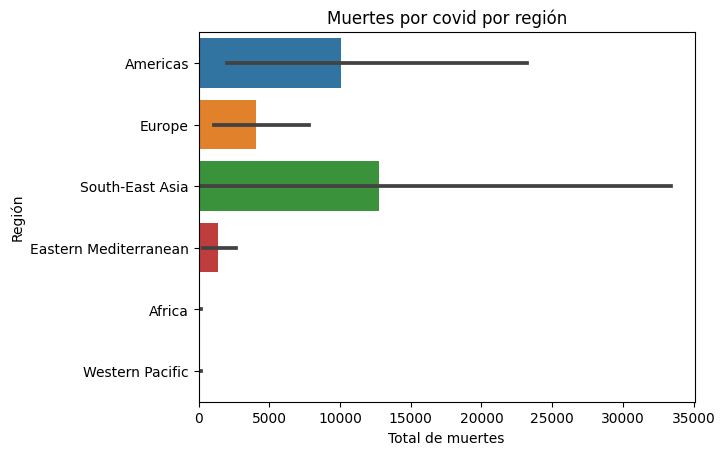

In [57]:
sorted_indexes = y.sort_values(ascending=False).index  # Obtener los índices ordenados
sorted_x = [x[i] for i in sorted_indexes]  # Ordenar las etiquetas x
sorted_y = [y[i] for i in sorted_indexes]  # Ordenar los valores y
ax=sns.barplot(x=sorted_y,y=sorted_x)
ax.set_title('Muertes por covid por región')
ax.set_xlabel('Total de muertes')
ax.set_ylabel('Región')

Podemos visualizar que la región en la que más muertes hubo, fue en America, seguida por Europa, y luego por el sudeste de Asia.

####Actualmente,sabemos que existen casos activos de Covid.¿Pero, cual es el top 5 de países que cuentan con esos casos activos?

In [64]:
x1=merged_df['Country']
y1=merged_df['Active']
sorted_data = sorted(zip(y1, x1), reverse=True)  #para ordenar de mayor a menor
top_data = sorted_data[:5]  #para obtener el top 5
top_x = [data[1] for data in top_data]
top_y = [data[0] for data in top_data]

Text(0, 0.5, 'Casos activos')

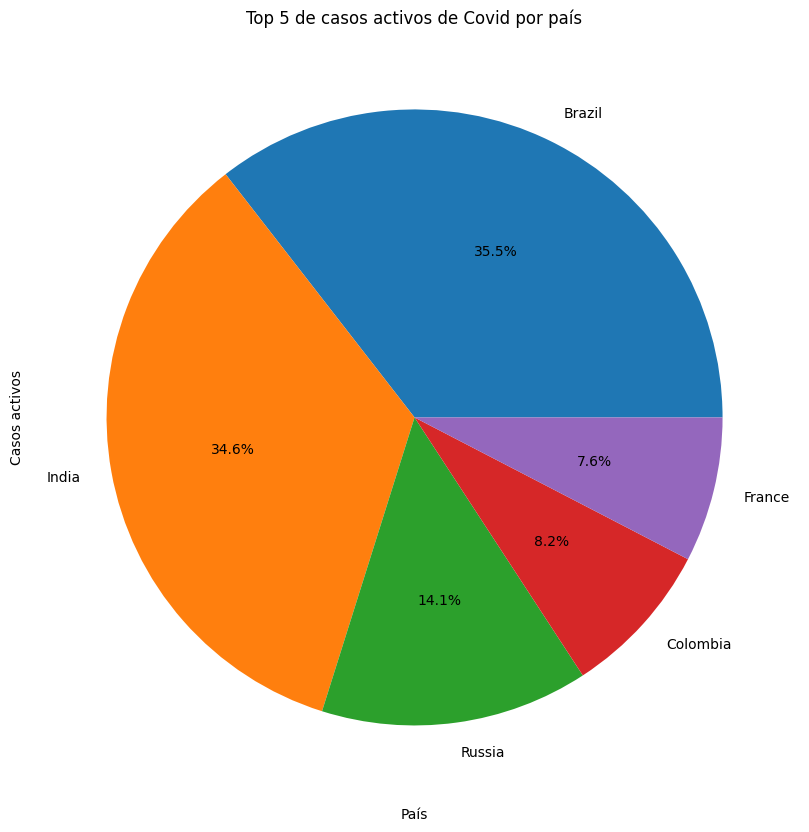

In [65]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.pie(top_y,labels=top_x,autopct='%1.1f%%')
ax.set_title('Top 5 de casos activos de Covid por país')
ax.set_xlabel('País')
ax.set_ylabel('Casos activos')

Gracias a la visualización obtenida, podemos decir que los países con la mayor cantidad de casos activos actualmente,son Estados unidos,Brazil, India, Reino Unido, y en un menos porcentaje, Rusia.

Es muy importante poder determinar, una comparativa entre la cantidad de personas que fallecieron y las que se recuperaron, ya que de esa forma podemos ver que tanto afecto el virus a la población en general. Es por lo que nos preguntamos:
####¿Cuál fue el porcentaje de muertes y de recuperados por region?

In [66]:
recuperados=df_covid['Recovered']
muertes=df_covid['Deaths']
region=df_covid['WHO Region']

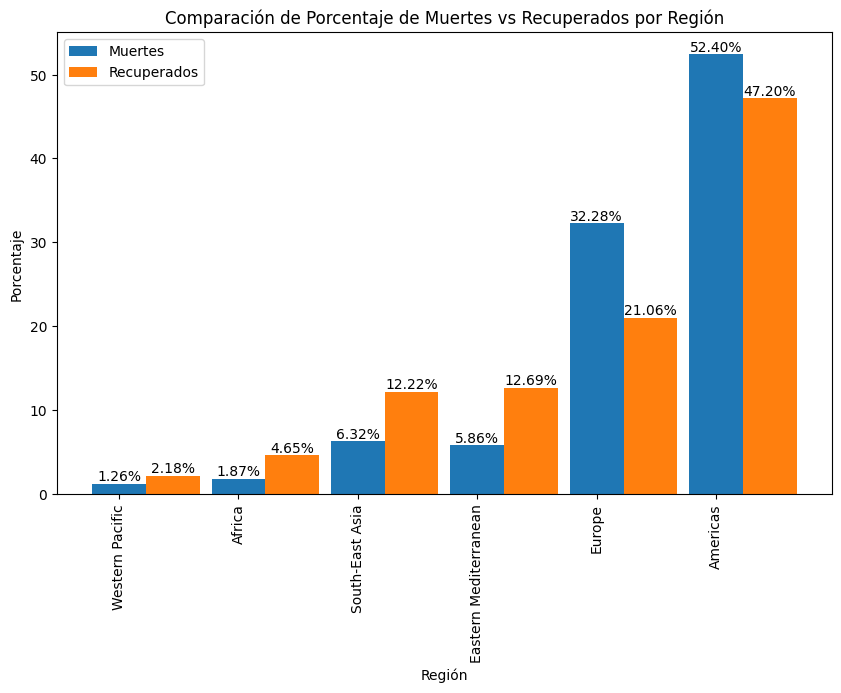

In [67]:
#DataFrame con las columnas de región, muertes y recuperados
df = pd.DataFrame({'Región': region, 'Muertes': muertes, 'Recuperados': recuperados})

df_grouped = df.groupby('Región').sum().reset_index() #Agrupo por región y sumo  muertes y recuperados

#Para ordenar los valores por cantidad
df_grouped=df_grouped.sort_values('Muertes',ascending=True)
df_grouped=df_grouped.sort_values('Recuperados',ascending=True)

#porcentajes de muertes y recuperados
total_muertes = df_grouped['Muertes'].sum()
total_recuperados = df_grouped['Recuperados'].sum()
df_grouped['Porcentaje Muertes'] = (df_grouped['Muertes'] / total_muertes) * 100
df_grouped['Porcentaje Recuperados'] = (df_grouped['Recuperados'] / total_recuperados) * 100

#gráfico
fig, ax = plt.subplots(figsize=(10, 6))
posiciones = range(len(df_grouped))
ancho_barras = 0.45

barras_muertes = ax.bar(posiciones, df_grouped['Porcentaje Muertes'], width=ancho_barras, label='Muertes')
barras_recuperados = ax.bar([p + ancho_barras for p in posiciones], df_grouped['Porcentaje Recuperados'], width=ancho_barras, label='Recuperados')

#Estilos de gráfico
ax.set_xticks(posiciones)
ax.set_xticklabels(df_grouped['Región'], rotation=90)
ax.legend()
ax.set_title('Comparación de Porcentaje de Muertes vs Recuperados por Región')
ax.set_xlabel('Región')
ax.set_ylabel('Porcentaje')

# Agregar etiquetas a las barras
for barra in barras_muertes + barras_recuperados:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width() / 2, altura, f'{altura:.2f}%', ha='center', va='bottom')

Gracias al grafico que compara el porcentaje de muertes vs porcentaje de recuperados, podemos sacar ciertas conclusiones, por ejemplo, si bien en America hubo un porcentaje alto de muertes, podemos visualizar que a su vez, tiene un porcentaje casi identico al de recuperados. Quizas para hacerlo mas representativo, se podria comparar en función de la cantidad de casos que hubieron, asi se obtendria del total de casos, que porcentaje murio y que porcentaje se recupero.

####Como se mencionó anteriormente, sería interesante poder visualizar según la cantidad de casos totales, cuantos se recuperaron y cuantos murieron?

In [68]:
recuperados=df_covid['Recovered']
muertes=df_covid['Deaths']
region=df_covid['WHO Region']
casos_confirmados=df_covid['Confirmed']

In [69]:
#DataFrame con las columnas de región y muertes
df = pd.DataFrame({'Región': region, 'Confirmed': casos_confirmados, 'Muertes': muertes,'Recuperados': recuperados})

# Agrupar por región y sumar las muertes
df_grouped = df.groupby('Región').sum().reset_index()
df_grouped

,Región,Confirmed,Muertes,Recuperados
0,Africa,723207,12223,440645
1,Americas,8839286,342732,4468616
2,Eastern Mediterranean,1490744,38339,1201400
3,Europe,3299523,211144,1993723
4,South-East Asia,1835297,41349,1156933
5,Western Pacific,292428,8249,206770


In [70]:
totales_confirm=casos_confirmados.sum()

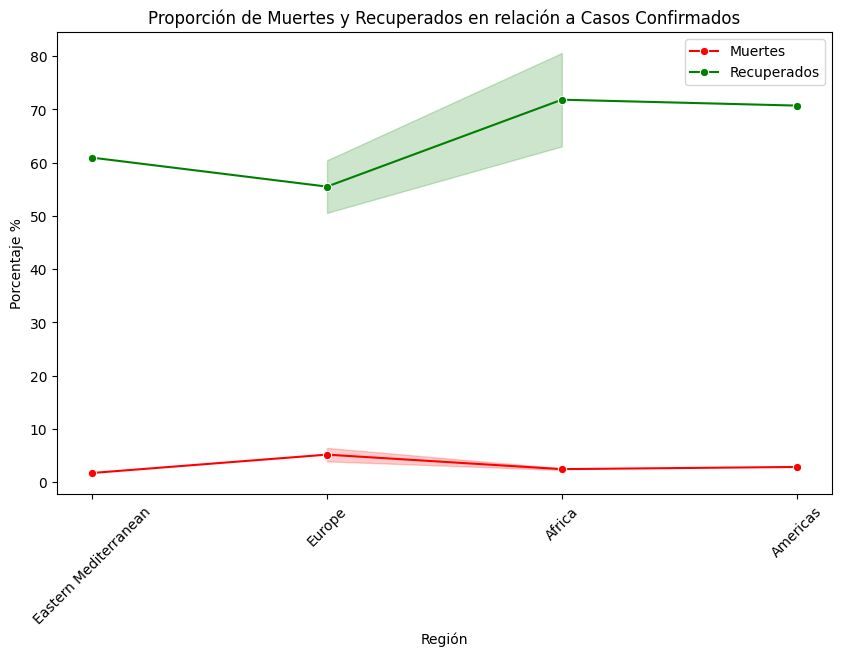

In [71]:
# Calcular la proporción de muertes y recuperados en relación a los casos confirmados
df_grouped['Porcentaje Muertes'] = df_grouped['Muertes'] / df_grouped['Confirmed']*100
df_grouped['Porcentaje Recuperados'] = df_grouped['Recuperados'] / df_grouped['Confirmed']*100

# Convertir el eje x en una variable categórica
fig, ax = plt.subplots(figsize=(10, 6))

#línea para las proporciones de muertes
sns.lineplot(x=region, y='Porcentaje Muertes', data=df_grouped, marker='o', color='red', label='Muertes')

#línea para las proporciones de recuperados
sns.lineplot(x=region, y='Porcentaje Recuperados', data=df_grouped, marker='o', color='green', label='Recuperados')

# Configurar el gráfico
ax.set_xlabel('Región')
ax.set_ylabel('Porcentaje %')
ax.set_title('Proporción de Muertes y Recuperados en relación a Casos Confirmados')

# Añadir leyenda
ax.legend()

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


Podemos visualizar entonces, que si bien la cantidad total de casos fue significativa, se puede decir llegar a la conclusión de que en su mayoria, se recuperaron, y solo fue en menor porcentaje la cantidad de muertes.

####Otra pregunta que podemos hacernos luego de visualizar los gráficos anteriores es , de la cantidad total de casos que hay confirmados, cuáles son los 5 paises principales en los que se encuentra la mayor cantidad de casos activos ?

In [72]:
pais=df_covid['Country']
casos_activos=df_covid['Active']

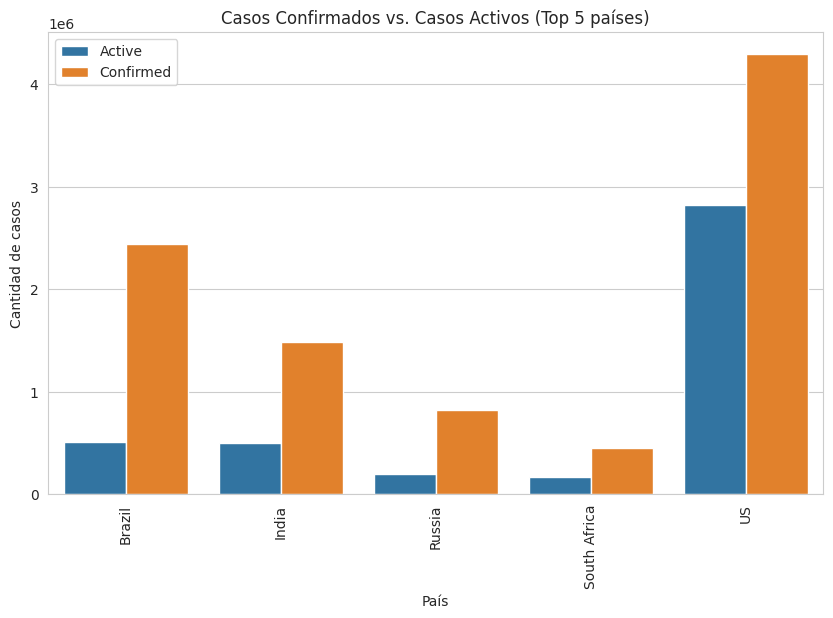

In [73]:
#DataFrame con las columnas de región y muertes
df = pd.DataFrame({'Country/Region': pais, 'Active': casos_activos,'Confirmed': casos_confirmados})

#agrupamos por region y sumamos las cantidades
df_grouped = df.groupby('Country/Region').sum().reset_index()

#Seleccionar el top5 de los casos confirmadoss
top5_countries = df_grouped.nlargest(5, 'Confirmed')['Country/Region']

# Filtrar el DataFrame solo para los cinco países seleccionados
df_top5 = df_grouped[df_grouped['Country/Region'].isin(top5_countries)]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Reorganizar los datos para el gráfico de barras apiladas
df_stacked = df_top5.set_index('Country/Region')[['Active', 'Confirmed']].stack().reset_index().rename(columns={'level_1': 'Tipo de Caso', 0: 'Cantidad de Casos'})

# Graficar el gráfico de barras apiladas
sns.barplot(x='Country/Region', y='Cantidad de Casos', hue='Tipo de Caso', data=df_stacked)

# Configurar los ejes y las etiquetas
plt.xlabel('País')
plt.ylabel('Cantidad de casos')
plt.title('Casos Confirmados vs. Casos Activos (Top 5 países)')
plt.xticks(rotation=90)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

Luego de visualizar el gráfico podemos ver que la cantidad de casos activos es mucho menos que la cantidad de casos totales. Esto se confirma, ya que luego de dos años de pandemia la cantidad de casos es mucho menor.

##¿Cuántos casos confirmados hay por región?

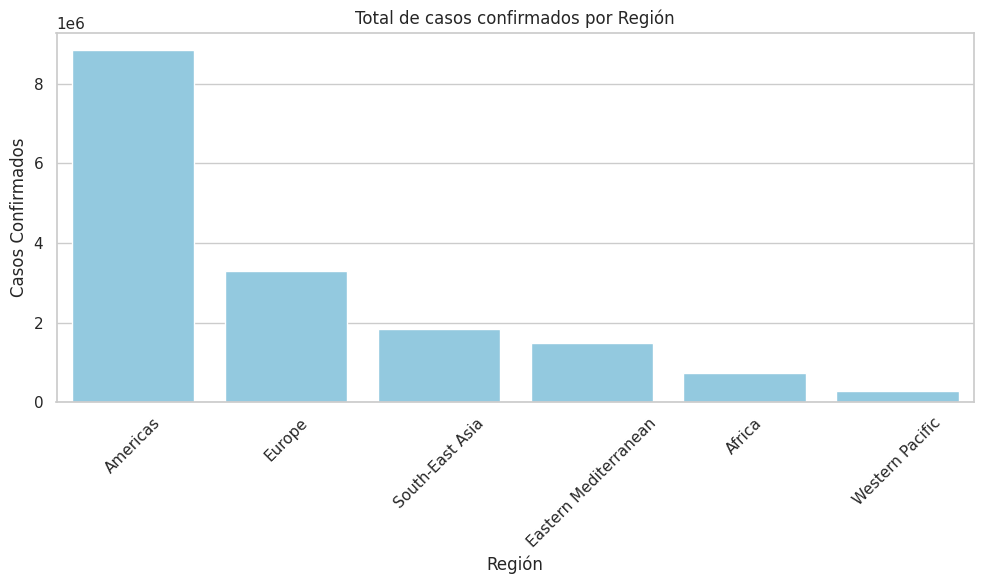

In [74]:
casos=df_covid['Confirmed']
recuperados=df_covid['Recovered']
region=df_covid['WHO Region']

df_grouped = pd.DataFrame({'WHO Region': region, 'Confirmed': casos})

# Agrupar por región y sumar los casos confirmados y recuperados
df_grouped = df_grouped.groupby('WHO Region').sum().reset_index()

# DataFrame por casos confirmados en orden descendente
df_grouped = df_grouped.sort_values('Confirmed', ascending=False)

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.barplot(data=df_grouped, x='WHO Region', y='Confirmed', color='skyblue')
plt.xlabel('Región')
plt.ylabel('Casos Confirmados')
plt.title('Total de casos confirmados por Región')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La idea de este gráfico, es poder ver la cantidad de casos confirmados de Covid-19 según la región del mundo.





####¿Cuál el top 5 de países con mayor cantidad de vacunados?

In [77]:
country=merged_df['Country']
total_vaccinations=merged_df['total_vaccinations']

In [87]:
sorted_data = sorted(zip(total_vaccinations, country), reverse=True)

top_data1 = sorted_data[:5]

top_x1 = [data[0] for data in top_data1]  # total_vaccinations
top_y1 = [data[1] for data in top_data1]  # Country

Text(0, 0.5, 'Total de vacunados')

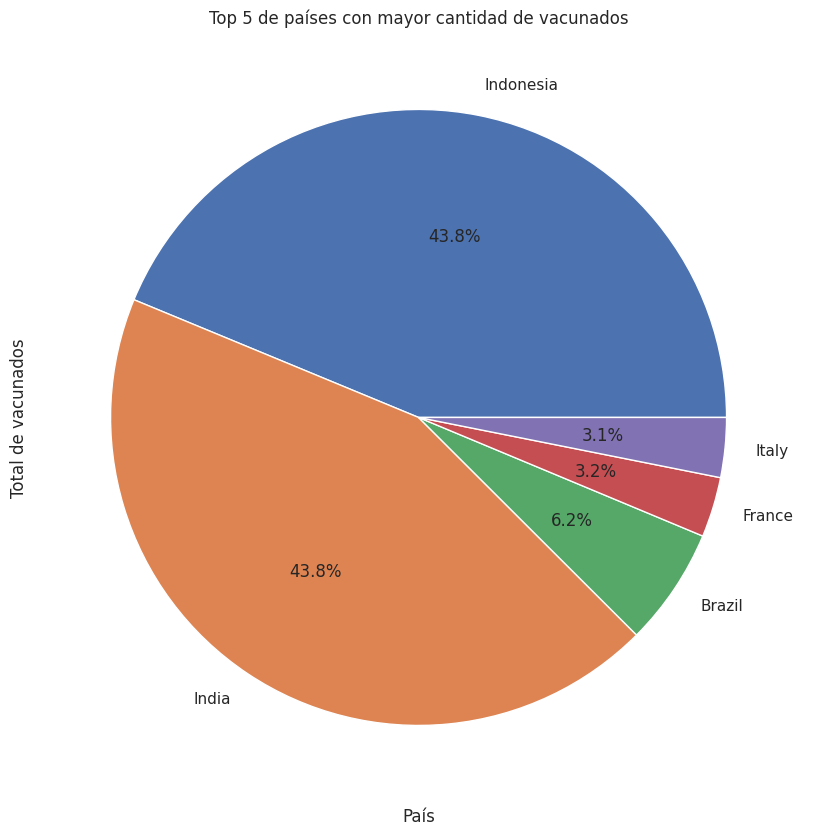

In [89]:
fig, ax = plt.subplots(figsize=(15, 10))

# Usar top_x1 como valores y top_y1 como etiquetas
ax.pie(top_x1, labels=top_y1, autopct='%1.1f%%')

ax.set_title('Top 5 de países con mayor cantidad de vacunados')
ax.set_xlabel('País')
ax.set_ylabel('Total de vacunados')